In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../ml')
from VarMiON import *

In [2]:
Theta_test = torch.rand((100,12,12),dtype=torch.float)
F_test = torch.rand((100,144),dtype=torch.float)
N_test = torch.rand((100,144),dtype=torch.float)
x_test = torch.rand((100,268,2),dtype=torch.float)
u_test = torch.rand((100,268),dtype=torch.float)

### Trunk

In [3]:
#Own implementation
GaussianRBF(2,72).forward(x_test).shape

TypeError: GaussianRBF.__init__() missing 1 required positional argument: 'output_dim'

In [4]:
#torch_rbf implementation
RBF(2,72,gaussian).forward(x_test).shape

torch.Size([100, 268, 72])

(array([1479241.,  121335.,   76057.,   57212.,   45741.,   38438.,
          33290.,   28894.,   26045.,   23347.]),
 array([1.27333194e-25, 9.99999419e-02, 1.99999884e-01, 2.99999833e-01,
        3.99999768e-01, 4.99999702e-01, 5.99999666e-01, 6.99999571e-01,
        7.99999535e-01, 8.99999440e-01, 9.99999404e-01]),
 <BarContainer object of 10 artists>)

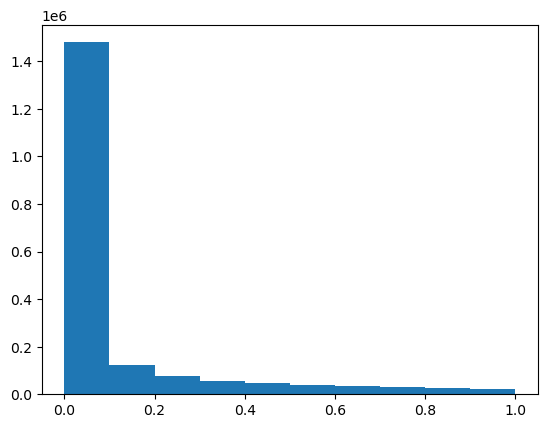

In [5]:
plt.hist(torch.abs((GaussianRBF(2,72).forward(x_test) - RBF(2,72,gaussian).forward(x_test))).flatten().detach().numpy())

In [6]:
x_g, y_g = np.mgrid[0:1:100*1j, 0:1:100*1j]
x_grid = np.array([x_g, y_g]).T.reshape((10000,2))
x_grid.shape
x_grid = torch.tensor(x_grid)
f = GaussianRBF(2,3).forward(x_grid[:,None,None,:]).sum(-1).squeeze().detach().numpy()

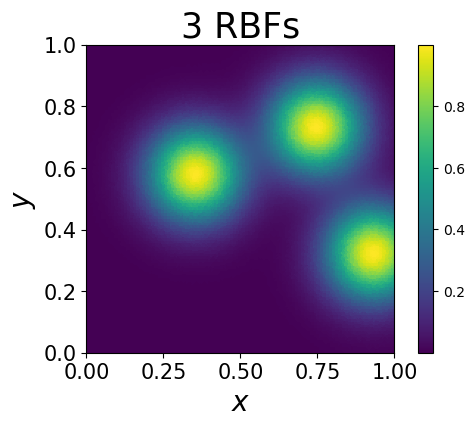

In [7]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x_grid[:,0], x_grid[:,1], f)
ax.set_title(r"3 RBFs", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)


### Non-linear branch

In [8]:
NLBranch = NLBranchNet()

In [9]:
output = NLBranch.forward(Theta_test)
print(output.shape)

torch.Size([100, 72, 72])


### Linear branch

In [10]:
LBranch = LBranchNet(144,72)

In [11]:
output = LBranch(F_test)
print(output.shape)

torch.Size([100, 72])


### VarMiON

In [17]:
Theta_test = torch.rand((100,12,12),dtype=torch.double)
F_test = torch.rand((100,12,12),dtype=torch.double)
N_test = torch.rand((100,12,12),dtype=torch.double)
x_test = torch.rand((100,268,2),dtype=torch.double)
u_test = torch.rand((100,268),dtype=torch.double)

In [18]:
hparams = {}
hparams['dtype'] = torch.float64
params = {}
params['hparams'] = hparams
model = VarMiON(params)

In [19]:
model.forward(Theta_test, F_test, N_test, x_test)

torch.Size([100, 72, 72])


tensor([[ 4.9412,  5.6341,  1.8587,  ...,  6.8731,  0.9253,  5.8759],
        [ 5.2580, 11.4113,  7.9228,  ...,  7.8562,  4.4768,  3.6111],
        [10.3475,  4.3561,  7.2892,  ...,  1.6255,  6.7645,  7.9676],
        ...,
        [ 3.2829,  3.9693,  5.0859,  ...,  0.1770,  2.7912,  3.7815],
        [10.3812,  8.5190, 14.5937,  ...,  4.8380,  6.9625, 12.0149],
        [ 5.8054,  1.4371,  0.3959,  ...,  6.9650,  4.2955,  1.6423]],
       dtype=torch.float64, grad_fn=<ViewBackward0>)

### Symmetric positive definiteness

In [10]:
hparams = {'NLB_outputReLU': False,
          'Cholesky': True}
hparams['dtype'] = torch.float64
params = {}
params['hparams'] = hparams
model = VarMiON(params)

[4.83972203e+02 4.91242642e+03 7.02576301e+03 4.77876932e+00
 4.65562578e+02 5.39776006e+03 3.69276256e+03 1.13637947e+04
 4.54373685e+00 4.81434538e+04 7.51651570e+00 3.61531392e+03
 6.45658137e+03 2.19862472e+02 3.60755148e+03 2.43596374e+03
 2.91757729e+02 7.44185640e+03 3.45157295e+02 2.63750753e+04
 2.21308056e+04 9.61658518e+02 6.89418500e+03 6.84597111e+04
 1.04516489e+03 1.02271691e+03 1.13460729e+03 9.41830491e+03
 4.57385349e+03 3.99946052e+04 1.04324199e+03 1.53182781e+03
 1.22584384e+03 2.46014915e+04 6.92253893e+03 1.82238589e+04
 1.47686043e+04 6.22332761e+03 4.73847743e+03 7.92864075e+01
 4.05608246e+04 7.48075819e+04 2.31803767e+04 1.72060637e+04
 1.20343460e+04 3.18125336e+04 1.39847820e+01 5.99204882e+03
 6.48571618e-01 2.11076213e+02 4.75429769e+04 6.23539475e+03
 1.05453827e+04 1.88074661e+03 1.63015932e+04 7.55212438e+03
 2.51212152e+03 1.05877404e+04 8.86241303e+03 9.00098789e+02
 2.94022294e+04 3.17419512e+03 3.02896300e+03 3.22045603e+04
 2.02840141e+04 7.207202

(array([61., 10.,  8.,  7.,  4.,  3.,  2.,  1.,  1.,  3.]),
 array([6.48571618e-01, 7.48134190e+03, 1.49620352e+04, 2.24427286e+04,
        2.99234219e+04, 3.74041152e+04, 4.48848085e+04, 5.23655019e+04,
        5.98461952e+04, 6.73268885e+04, 7.48075819e+04]),
 <BarContainer object of 10 artists>)

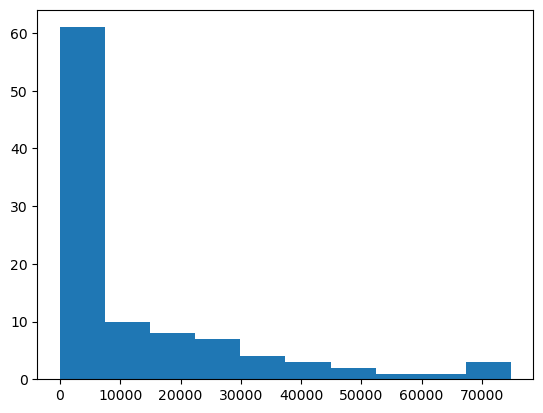

In [17]:
Theta_test = torch.rand((100,12,12),dtype=torch.double)
D = model.NLBranch.forward(Theta_test)
v = torch.normal(0,1,(100,1))
# v = torch.zeros((100,1))
pd = torch.einsum('ni,nij,nj->n',v,D,v).detach().numpy()

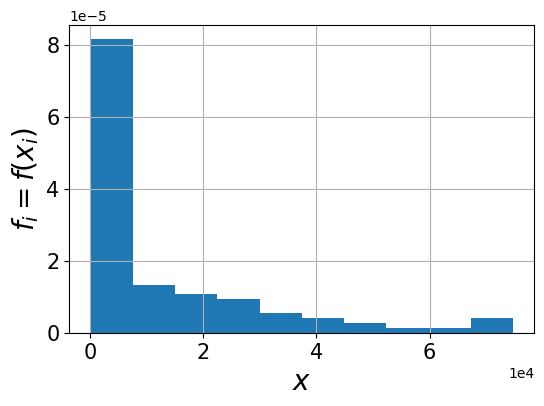

In [21]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.hist(pd)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$\mathbf{v}$', fontsize=size_axeslabels)
ax.set_ylabel(r'count', fontsize=size_axeslabels)
ax.grid()

# plt.savefig("1dgrfdelta.pdf", bbox_inches='tight')

### Scale invariance

In [20]:
Theta_test = torch.rand((100,12,12),dtype=torch.double)
F_test = torch.rand((100,12,12),dtype=torch.double)
N_test = torch.rand((100,12,12),dtype=torch.double)
x_test = torch.rand((100,268,2),dtype=torch.double)
u_test = torch.rand((100,268),dtype=torch.double)

In [22]:
hparams = {'scale_invariance': True}
hparams['dtype'] = torch.float64
params = {}
params['hparams'] = hparams
model = VarMiON(params)

In [23]:
labda = torch.rand(100,1,1, dtype=torch.double)

In [24]:
torch.abs(model.NLBranch(labda*Theta_test) - 1/labda*model.NLBranch(Theta_test))

tensor([[[0.0000e+00, 2.6645e-15, 8.8818e-16,  ..., 3.1086e-15,
          0.0000e+00, 2.6645e-15],
         [5.5511e-17, 3.5527e-15, 4.4409e-16,  ..., 1.7764e-15,
          8.8818e-16, 0.0000e+00],
         [1.7764e-15, 0.0000e+00, 1.7764e-15,  ..., 8.8818e-16,
          2.6645e-15, 0.0000e+00],
         ...,
         [4.4409e-16, 1.7764e-15, 6.6613e-16,  ..., 1.7764e-15,
          2.2204e-16, 3.5527e-15],
         [1.7764e-15, 0.0000e+00, 3.5527e-15,  ..., 0.0000e+00,
          1.7764e-15, 1.7764e-15],
         [4.4409e-16, 0.0000e+00, 0.0000e+00,  ..., 1.7764e-15,
          8.8818e-16, 8.8818e-16]],

        [[0.0000e+00, 0.0000e+00, 4.4409e-16,  ..., 0.0000e+00,
          2.2204e-16, 9.9920e-16],
         [3.3307e-16, 6.6613e-16, 1.1102e-16,  ..., 8.8818e-16,
          5.2736e-16, 8.8818e-16],
         [0.0000e+00, 4.4409e-16, 0.0000e+00,  ..., 4.4409e-16,
          6.6613e-16, 8.8818e-16],
         ...,
         [1.6653e-16, 0.0000e+00, 0.0000e+00,  ..., 2.2204e-16,
          3.885

(array([4.177e+03, 1.497e+03, 9.750e+02, 2.140e+02, 2.440e+02, 2.600e+01,
        4.500e+01, 6.000e+00, 1.300e+01, 3.000e+00]),
 array([0.00000000e+00, 2.77555756e-17, 5.55111512e-17, 8.32667268e-17,
        1.11022302e-16, 1.38777878e-16, 1.66533454e-16, 1.94289029e-16,
        2.22044605e-16, 2.49800181e-16, 2.77555756e-16]),
 <BarContainer object of 10 artists>)

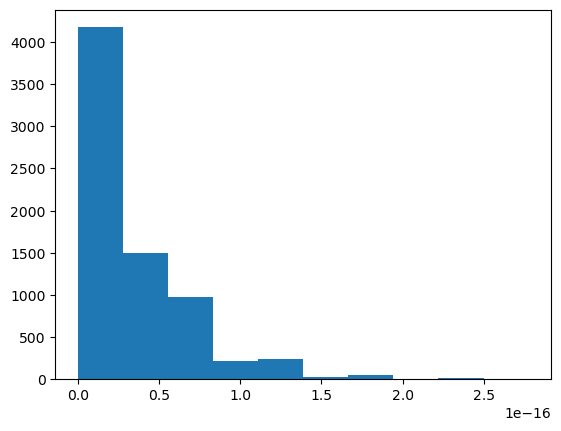

In [16]:
labda = torch.rand((100,1,1), dtype = torch.double)
error = torch.abs(model.LBranchF(labda*F_test) - labda[:,:,0]*model.LBranchF(F_test)).flatten().detach().numpy()

plt.hist(error)